# <div align="center"> **Movie Data Analysis** </div>

###### <div align="center"> Riya Pathak (DA) </div>
###### <div align="left"> 06-02-2024 </div> 

## Exploring the data

In [1]:
# Importing the required libraries

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import ast
import datetime
from pandas import Series, DataFrame

In [2]:
# Read the csv file

df = pd.read_csv('TMDB_movies.csv')

In [3]:
# Check the shape of the cvs  (rows, columns)

df.shape

(4803, 20)

In [4]:
# Check the data types of the columns present in the dataset

df.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [5]:
# Describing the numerical columns

df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [6]:
# Checking the nulls in the dataset for each column

df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [7]:
# Total number of nulls in the dataset

df.isnull().sum().sum()

3941

In [8]:
# lets identify the amount of nulls and put them into a data frame 

def null_vals(dataframe):
    '''function to show both number of nulls and the percentage of nulls in the whole column'''
    null_vals = dataframe.isnull().sum() ## How many nulls in each column
    total_cnt = len(dataframe) ## Total entries in the dataframe
    null_vals = pd.DataFrame(null_vals,columns=['null']) ## Put the number of nulls in a single dataframe
    null_vals['percent'] = round((null_vals['null']/total_cnt)*100,3) ## Round how many nulls are there, as %, of the df
    
    return null_vals.sort_values('percent', ascending=False)

In [9]:
null_vals(df)

,null,percent
homepage,3091,64.356
tagline,844,17.572
overview,3,0.062
runtime,2,0.042
release_date,1,0.021
budget,0,0.000
vote_average,0,0.000
title,0,0.000
status,0,0.000
spoken_languages,0,0.000


In [10]:
# drop embarked and embark_town as they are only .224% of the df using the dropna method 

df.dropna(
    axis = 0, # default
    how = 'any', # default
    subset = ['overview', 'runtime'],
    inplace = True
)

In [11]:
null_vals(df)

,null,percent
homepage,3088,64.333
tagline,841,17.521
release_date,1,0.021
budget,0,0.000
vote_average,0,0.000
title,0,0.000
status,0,0.000
spoken_languages,0,0.000
runtime,0,0.000
revenue,0,0.000


In [12]:
# Dropping null rows

df.dropna(subset=['release_date'], inplace=True)  
df.dropna(subset=['production_companies'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4799 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4799 non-null   int64  
 1   genres                4799 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4799 non-null   int64  
 4   keywords              4799 non-null   object 
 5   original_language     4799 non-null   object 
 6   original_title        4799 non-null   object 
 7   overview              4799 non-null   object 
 8   popularity            4799 non-null   float64
 9   production_companies  4799 non-null   object 
 10  production_countries  4799 non-null   object 
 11  release_date          4799 non-null   object 
 12  revenue               4799 non-null   int64  
 13  runtime               4799 non-null   float64
 14  spoken_languages      4799 non-null   object 
 15  status                4799

In [13]:
# Checking duplicates in data

duplicate_rows = df.duplicated()
duplicate_rows

0       False
1       False
2       False
3       False
4       False
        ...  
4798    False
4799    False
4800    False
4801    False
4802    False
Length: 4799, dtype: bool

In [14]:
# Add a profit column in the data frame by subtracting budget from total revenue

df['profit'] = df['revenue'] - df['budget']

In [15]:
# Extract year from release_date and create a new column in the data frame

df['year'] = pd.DatetimeIndex(df['release_date']).year

In [16]:
# Change the columns to string from dictionary

columns = ['genres', 'keywords', 'production_companies', 'production_countries', 'spoken_languages']
for col in columns: 
    df[col] = df[col].apply(lambda x: ast.literal_eval(x))
    df[col] = df[col].apply(lambda x: [col['name'] for col in x])
    df[col] = [','.join(map(str, l)) for l in df[col]]

In [17]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,profit,year
0,237000000,"Action,Adventure,Fantasy,Science Fiction",http://www.avatarmovie.com/,19995,"culture clash,future,space war,space colony,so...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners,Twentieth Century Fox ...",...,2787965087,162.0,"English,Español",Released,Enter the World of Pandora.,Avatar,7.2,11800,2550965087,2009
1,300000000,"Adventure,Fantasy,Action",http://disney.go.com/disneypictures/pirates/,285,"ocean,drug abuse,exotic island,east india trad...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",...,961000000,169.0,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,661000000,2007
2,245000000,"Action,Adventure,Crime",http://www.sonypictures.com/movies/spectre/,206647,"spy,based on novel,secret agent,sequel,mi6,bri...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures,Danjaq,B24",...,880674609,148.0,"Français,English,Español,Italiano,Deutsch",Released,A Plan No One Escapes,Spectre,6.3,4466,635674609,2015
3,250000000,"Action,Crime,Drama,Thriller",http://www.thedarkknightrises.com/,49026,"dc comics,crime fighter,terrorist,secret ident...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures,Warner Bros.,DC Entertainme...",...,1084939099,165.0,English,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,834939099,2012
4,260000000,"Action,Adventure,Science Fiction",http://movies.disney.com/john-carter,49529,"based on novel,mars,medallion,space travel,pri...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,...,284139100,132.0,English,Released,"Lost in our world, found in another.",John Carter,6.1,2124,24139100,2012


# Section 1: Visualtizations

### 1:  Genre v/s budget, revenue, popularity, votes

In [18]:
# Created a new data frame with required columns

movie_revenue = df[['budget', 'genres', 'original_title', 'popularity', 'production_companies', 'production_countries', 'revenue', 'runtime', 'vote_average','vote_count']].copy()

In [19]:
# Creating a new data frame to split the rows with individual genres for each movie

df_movie_genre = df[['budget','genres','original_title','popularity','production_companies','revenue','runtime','vote_average','vote_count','year','profit']]
df_movie_genre.head()

s = df['genres'].str.split(',').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genres'
del df_movie_genre['genres']
df_genres = df_movie_genre.join(s)
df_genres.head()


C:\Users\riyap\AppData\Local\Temp\ipykernel_60516\3668439126.py:6: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  s = df['genres'].str.split(',').apply(Series, 1).stack()


,budget,original_title,popularity,production_companies,revenue,runtime,vote_average,vote_count,year,profit,genres
0,237000000,Avatar,150.437577,"Ingenious Film Partners,Twentieth Century Fox ...",2787965087,162.0,7.2,11800,2009,2550965087,Action
0,237000000,Avatar,150.437577,"Ingenious Film Partners,Twentieth Century Fox ...",2787965087,162.0,7.2,11800,2009,2550965087,Adventure
0,237000000,Avatar,150.437577,"Ingenious Film Partners,Twentieth Century Fox ...",2787965087,162.0,7.2,11800,2009,2550965087,Fantasy
0,237000000,Avatar,150.437577,"Ingenious Film Partners,Twentieth Century Fox ...",2787965087,162.0,7.2,11800,2009,2550965087,Science Fiction
1,300000000,Pirates of the Caribbean: At World's End,139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",961000000,169.0,6.9,4500,2007,661000000,Adventure


In [20]:
# Total count with group by each genre

len(df_genres['genres'].unique())
unq_genre = (pd.DataFrame(df_genres.groupby('genres').original_title.nunique())).sort_values('original_title', ascending=False).reset_index().head(10)
unq_genre.rename(columns={"genres":"Genre", "original_title":"Total Movies"}, inplace=True)
unq_genre

,Genre,Total Movies
0,Drama,2295
1,Comedy,1722
2,Thriller,1274
3,Action,1154
4,Romance,894
5,Adventure,790
6,Crime,696
7,Science Fiction,535
8,Horror,519
9,Family,513


In [21]:
# Grouping genre with revenue, vote_count, profit, popularity

top_5_genre_revenue = df_genres.\
  groupby('genres')[['revenue']].\
  sum().\
  sort_values(by = ['revenue'], ascending=[False]).\
  head(5).\
  reset_index()

top_5_voted_genre = df_genres.\
  groupby('genres')[['vote_count']].\
  sum().\
  sort_values(by = ['vote_count'], ascending=[False]).\
  head(5).\
  reset_index()

top_5_genre_budget = df_genres.\
  groupby('genres')[['profit']].\
  sum().\
  sort_values(by = ['profit'], ascending=[False]).\
  head(5).\
  reset_index()

top_5_popular_revenue = df_genres.\
  groupby('genres')[['popularity']].\
  sum().\
  sort_values(by = ['popularity'], ascending=[False]).\
  head(5).\
  reset_index()

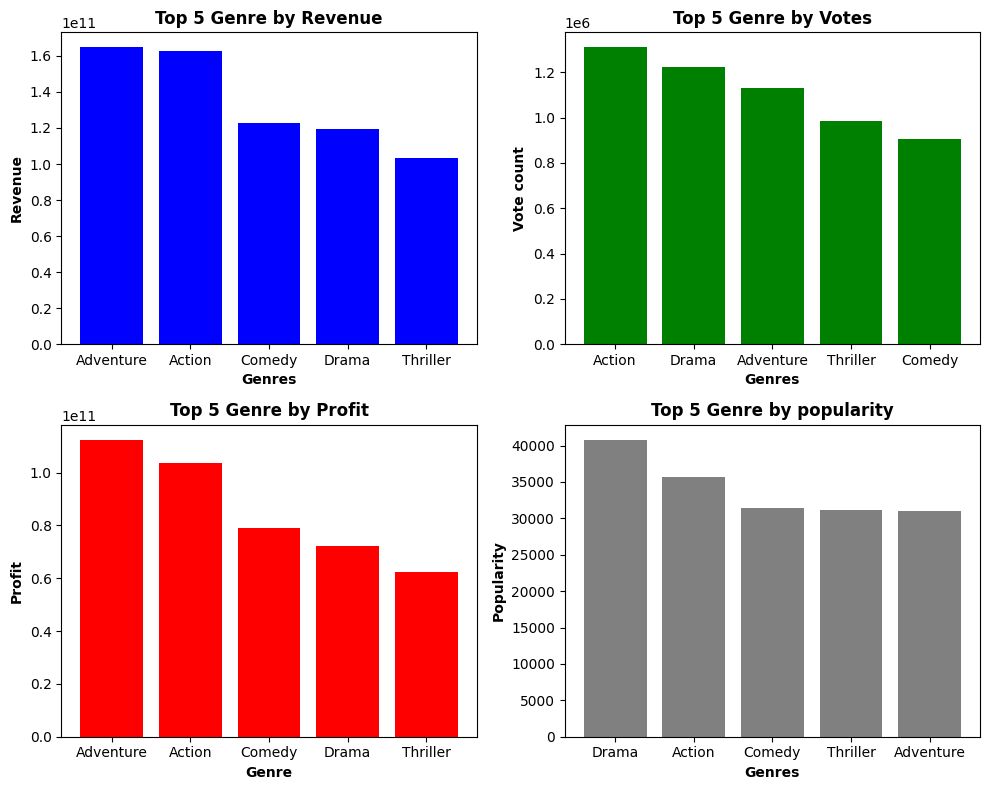

In [22]:
# Graph to represent Genres
# Create subplots with a 2x2 grid (rows, columns)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot on the first subplot (top-left) - Scatter plot
# axs[row,col]
axs[0, 0].bar(top_5_genre_revenue['genres'], top_5_genre_revenue['revenue'], color='blue')
axs[0, 0].set_xlabel('Genres', weight='bold')
axs[0, 0].set_ylabel('Revenue', weight='bold')
axs[0, 0].set_title('Top 5 Genre by Revenue', weight='bold')

# Plot on the second subplot (top-right) - Box plot
axs[0, 1].bar(top_5_voted_genre['genres'], top_5_voted_genre['vote_count'], color='green')
axs[0, 1].set_xlabel('Genres', weight='bold')
axs[0, 1].set_ylabel('Vote count', weight='bold')
axs[0, 1].set_title('Top 5 Genre by Votes', weight='bold')

# plt.figure(figsize=(8, 4))
# sns.boxplot(data=iris, x='species', y='sepal_width')
# plt.title('Box Plot')
# plt.show()


# Plot on the third subplot (bottom-left) - Violin plot
axs[1, 0].bar(top_5_genre_budget['genres'], top_5_genre_budget['profit'], color='red')
axs[1, 0].set_xlabel('Genre', weight='bold')
axs[1, 0].set_ylabel('Profit', weight='bold')
axs[1, 0].set_title('Top 5 Genre by Profit', weight='bold')

# Plot on the fourth subplot (bottom-right) - Bar plot
axs[1, 1].bar(top_5_popular_revenue['genres'], top_5_popular_revenue['popularity'], color='grey')
axs[1, 1].set_xlabel('Genres', weight='bold')
axs[1, 1].set_ylabel('Popularity', weight='bold')
axs[1, 1].set_title('Top 5 Genre by popularity', weight='bold')

#rc('text', usetex=True)
# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()

### 2. Number of movies over the years

In [23]:
# # Get movies made per year, create new data frame
# This visualization is representing the top 10 production companies with highest number of movie production

df_movie = df[['budget','genres','original_title','popularity','production_companies','revenue','runtime','vote_average','vote_count','year','profit']]
df_movie.head()

movies_year = pd.DataFrame(df_movie.groupby('year').original_title.nunique()).sort_values('year', ascending = False)
movies_year.head(5)

,original_title
year,
2017,1
2016,104
2015,214
2014,237
2013,231


Text(0, 0.5, 'Number of movies')

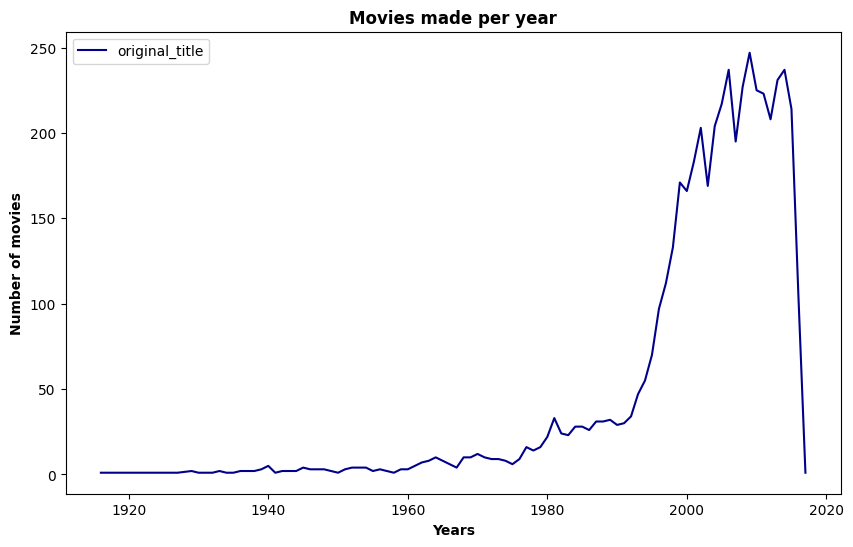

In [24]:
movies_year.plot.line(title = 'Movies made per year',color='DarkBlue',figsize=(10, 6));
plt.title('Movies made per year', fontweight='bold')
plt.xlabel('Years', fontweight='bold')
plt.ylabel('Number of movies', fontweight='bold')

### 3. Top Production Companies by total movies

In [25]:
# Split production companies and create a new entry for each of the production company a movie falls into

s = df['production_companies'].str.split(',').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'production_companies'
del df_movie['production_companies']
df_prod_company = df_movie.join(s)

C:\Users\riyap\AppData\Local\Temp\ipykernel_60516\2281222762.py:3: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  s = df['production_companies'].str.split(',').apply(Series, 1).stack()


In [26]:
df_prod_company.head()

,budget,genres,original_title,popularity,revenue,runtime,vote_average,vote_count,year,profit,production_companies
0,237000000,"Action,Adventure,Fantasy,Science Fiction",Avatar,150.437577,2787965087,162.0,7.2,11800,2009,2550965087,Ingenious Film Partners
0,237000000,"Action,Adventure,Fantasy,Science Fiction",Avatar,150.437577,2787965087,162.0,7.2,11800,2009,2550965087,Twentieth Century Fox Film Corporation
0,237000000,"Action,Adventure,Fantasy,Science Fiction",Avatar,150.437577,2787965087,162.0,7.2,11800,2009,2550965087,Dune Entertainment
0,237000000,"Action,Adventure,Fantasy,Science Fiction",Avatar,150.437577,2787965087,162.0,7.2,11800,2009,2550965087,Lightstorm Entertainment
1,300000000,"Adventure,Fantasy,Action",Pirates of the Caribbean: At World's End,139.082615,961000000,169.0,6.9,4500,2007,661000000,Walt Disney Pictures


In [27]:
# Replacing the null values in production_companies with nan

df_prod_company['production_companies'] = df_prod_company.production_companies.replace('',np.nan,regex = True)

In [28]:
# Unique Production Companies

len(df_prod_company['production_companies'].unique())

5024

In [29]:
# Total movies made by each production_companies

prod_comp = (pd.DataFrame(df_prod_company.groupby('production_companies').original_title.nunique())).sort_values('original_title', ascending=False).reset_index().head(10)
prod_comp.rename(columns={"production_companies":"Production Companies", "original_title":"Total Movies"}, inplace=True)
prod_comp

,Production Companies,Total Movies
0,Warner Bros.,319
1,Universal Pictures,311
2,Paramount Pictures,285
3,Twentieth Century Fox Film Corporation,222
4,Columbia Pictures,201
5,New Line Cinema,165
6,Metro-Goldwyn-Mayer (MGM),122
7,Touchstone Pictures,118
8,Walt Disney Pictures,114
9,Relativity Media,102


C:\Users\riyap\AppData\Local\Temp\ipykernel_60516\3671126852.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Production Companies",


Text(0.5, 1.0, 'Top Production Companies')

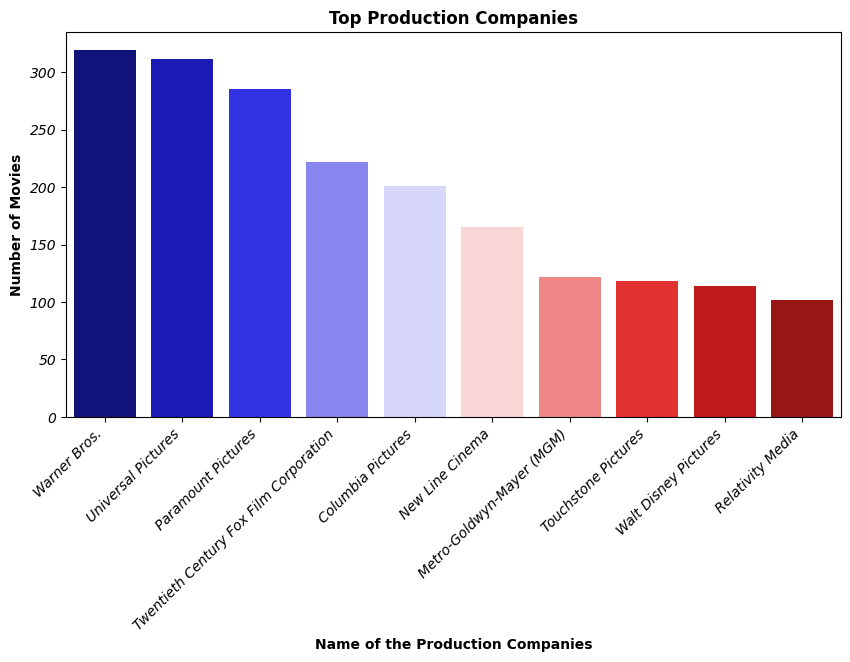

In [30]:
# Barplot to present the top Production Companies by total number of movies

plt.figure(figsize=(10,5))

sns.barplot(x="Production Companies",
            y="Total Movies",
            data=prod_comp,
            palette='seismic')

# We can also adjust the labels on x-axis and for y-axis plt.yticks

plt.xticks(rotation=45, # rotating labels
           horizontalalignment = 'right', # aligning them with the bars
           fontweight = 'light',
           fontsize = 'medium',
           style = 'italic' # setting the fonts
          )

plt.yticks(#rotation=45, # rotating labels
           horizontalalignment = 'right', # aligning them with the bars
           fontweight = 'light',
           fontsize = 'medium',
           style = 'italic', # setting the fonts
          )

#plt.yticks(rotation=45)
plt.xlabel('Name of the Production Companies', weight='bold')
plt.ylabel('Number of Movies',  weight='bold')

plt.title('Top Production Companies',  weight='bold') # naming the plot

### 4. Numeric correlation of data

In [31]:
# Correlation for the numeric Data

df_movie.corr(numeric_only = True)

,budget,popularity,revenue,runtime,vote_average,vote_count,year,profit
budget,1.000000,0.505250,0.730764,0.269684,0.092399,0.593071,0.169418,0.575782
popularity,0.505250,1.000000,0.644631,0.225265,0.274408,0.778066,0.102447,0.620782
revenue,0.730764,0.644631,1.000000,0.251112,0.197437,0.781437,0.090537,0.978881
runtime,0.269684,0.225265,0.251112,1.000000,0.372221,0.271955,-0.166678,0.220000
vote_average,0.092399,0.274408,0.197437,0.372221,1.000000,0.313869,-0.198496,0.208804
vote_count,0.593071,0.778066,0.781437,0.271955,0.313869,1.000000,0.114598,0.758338
year,0.169418,0.102447,0.090537,-0.166678,-0.198496,0.114598,1.000000,0.057702
profit,0.575782,0.620782,0.978881,0.220000,0.208804,0.758338,0.057702,1.000000


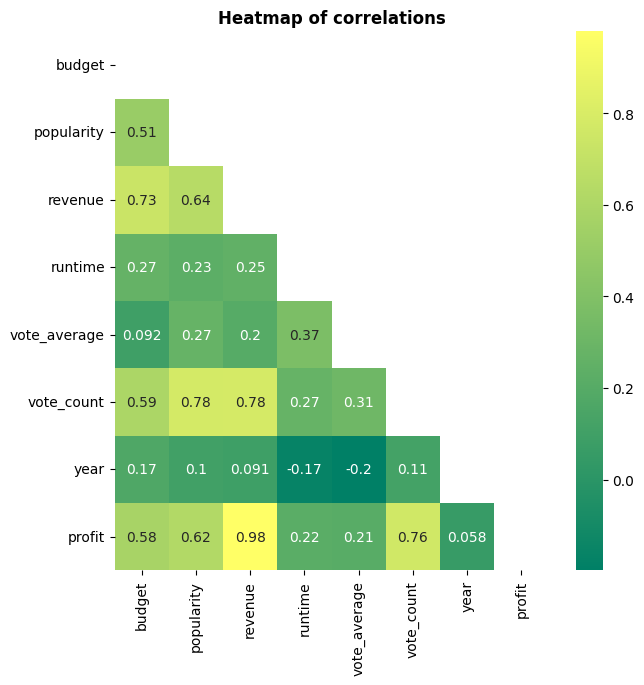

In [32]:
## Using heatmap to visualise correlations in the data

plt.figure(figsize = (7,7))
sns.heatmap(df_movie.corr(numeric_only = True),
            annot = True,
            cmap = 'summer',
            mask = np.triu(df_movie.corr(numeric_only = True)),
           )            

plt.title("Heatmap of correlations",  weight='bold')
plt.show()

In [33]:
# Checking the Pearson Correlation Coefficient

from scipy import stats
pearson_coef1, p_value1 = stats.pearsonr(df["budget"], df["revenue"])
print("Pearson Correlation Coefficient: ", round(pearson_coef1, 2), "and a P-value of:", "{0:.2f}".format(p_value1,))

Pearson Correlation Coefficient:  0.73 and a P-value of: 0.00


In [34]:
# Checking the Pearson Correlation Coefficient

pearson_coef3, p_value3 = stats.pearsonr(df["revenue"], df["runtime"])
print("Pearson Correlation Coefficient: ", round(pearson_coef3, 2), "and a P-value of:", "{0:.2f}".format(p_value3))

Pearson Correlation Coefficient:  0.25 and a P-value of: 0.00


### 5. Top language in movie production

In [35]:
# Fetching top 3 original languages used in movies

df_lang = df['original_language'].value_counts().rename_axis('Language').reset_index(name = 'counts').sort_values('counts', ascending = False).head(3)
df_lang

,Language,counts
0,en,4503
1,fr,70
2,es,32


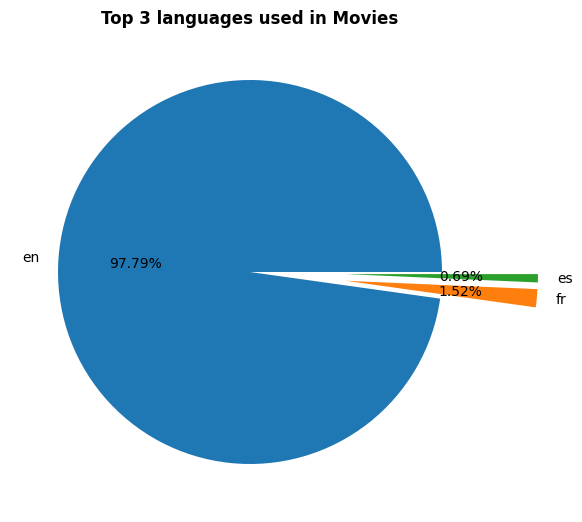

In [45]:
# Plotting the languages on a pie chart

language_label = df_lang.Language
movie_count = df_lang.counts
pie_explode = [0, 0.5 , 0.5]
# Visualize pie chart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
#ax.axis('equal')

plt.title("Top 3 languages used in Movies",  weight='bold')
ax.pie(movie_count, labels = language_label, autopct='%1.2f%%', explode = pie_explode)
plt.show()

# **Section 2: Keypoints**

### 1. Keypoint - Higly budgeted movies return higher revenue

In [37]:
df.corr(method='pearson', numeric_only=True)

,budget,id,popularity,revenue,runtime,vote_average,vote_count,profit,year
budget,1.000000,-0.088031,0.505250,0.730764,0.269684,0.092399,0.593071,0.575782,0.169418
id,-0.088031,1.000000,0.033385,-0.049192,-0.150036,-0.266241,-0.002479,-0.032556,0.434686
popularity,0.505250,0.033385,1.000000,0.644631,0.225265,0.274408,0.778066,0.620782,0.102447
revenue,0.730764,-0.049192,0.644631,1.000000,0.251112,0.197437,0.781437,0.978881,0.090537
runtime,0.269684,-0.150036,0.225265,0.251112,1.000000,0.372221,0.271955,0.220000,-0.166678
vote_average,0.092399,-0.266241,0.274408,0.197437,0.372221,1.000000,0.313869,0.208804,-0.198496
vote_count,0.593071,-0.002479,0.778066,0.781437,0.271955,0.313869,1.000000,0.758338,0.114598
profit,0.575782,-0.032556,0.620782,0.978881,0.220000,0.208804,0.758338,1.000000,0.057702
year,0.169418,0.434686,0.102447,0.090537,-0.166678,-0.198496,0.114598,0.057702,1.000000


Text(0, 0.5, 'Budget')

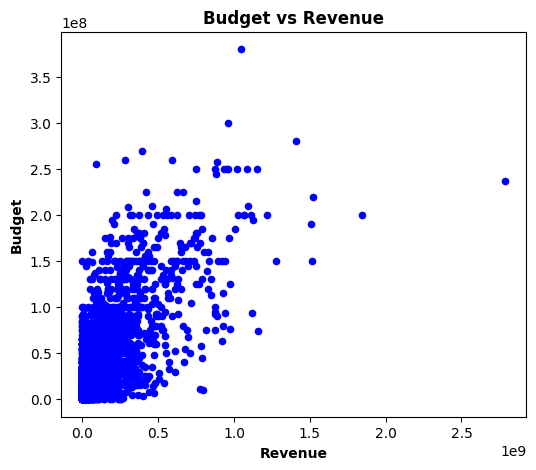

In [38]:
# Correlation = 0.730764 - budget and revenue they have a strong linear relationship also shown in the graph below
# Higly budgeted movies return higher revenue

df.plot.scatter(x='revenue', y='budget',title='Budget vs Revenue',color='Blue',figsize=(6,5));
plt.title('Budget vs Revenue',weight='bold')
plt.xlabel('Revenue', weight='bold')
plt.ylabel('Budget', weight='bold')

### 2. Keypoint - For high revenue and profit the best genres to go for are Adventure, Action or Comedy

<b> As described in Visualization 1: Genre v/s budget, revenue, popularity, votes </b>


# Section 3: Movies

### 1. Inception movie - 2010
> <i>Science fiction thriller which explores the boundaries between dream and reality. </i>

<b>The movie with the highest vote count</b>

In [39]:
# Selecting the movie with the maximum vote counts

highest_vote = df['vote_count'].max()
df_run = df.loc[(df['vote_count'] == highest_vote)][['budget','genres','original_title','popularity','revenue', 'runtime','vote_count','profit','year']].sort_values('vote_count', ascending=False)
df_run

,budget,genres,original_title,popularity,revenue,runtime,vote_count,profit,year
96,160000000,"Action,Thriller,Science Fiction,Mystery,Adventure",Inception,167.58371,825532764,148.0,13752,665532764,2010


In [40]:
# Selecting top 5 movies with maximum vote counts

df_compare = df.loc[(df['vote_count'] <= highest_vote)][['budget','genres','original_title','popularity','revenue', 'runtime','vote_count','profit', 'year']].sort_values('vote_count', ascending=False)
df_compare.head()

,budget,genres,original_title,popularity,revenue,runtime,vote_count,profit,year
96,160000000,"Action,Thriller,Science Fiction,Mystery,Adventure",Inception,167.583710,825532764,148.0,13752,665532764,2010
65,185000000,"Drama,Action,Crime,Thriller",The Dark Knight,187.322927,1004558444,152.0,12002,819558444,2008
0,237000000,"Action,Adventure,Fantasy,Science Fiction",Avatar,150.437577,2787965087,162.0,11800,2550965087,2009
16,220000000,"Science Fiction,Action,Adventure",The Avengers,144.448633,1519557910,143.0,11776,1299557910,2012
788,58000000,"Action,Adventure,Comedy",Deadpool,514.569956,783112979,108.0,10995,725112979,2016


In [41]:
# Comparing with movie with the highest budget

highest_budget = df['budget'].max()
df_budget = df.loc[(df['budget']==highest_budget)][['budget','genres','original_title','popularity','revenue', 'runtime','vote_count','profit', 'year']].sort_values('budget', ascending=False)
df_budget    

,budget,genres,original_title,popularity,revenue,runtime,vote_count,profit,year
17,380000000,"Adventure,Action,Fantasy",Pirates of the Caribbean: On Stranger Tides,135.413856,1045713802,136.0,4948,665713802,2011


#### Findings:

> <li> Inception is the most voted and popular movie. </li> 
> <li> It is an average budget movie ,its returned revenue and profit are equivalent to highest budget movie.  </li> 
> <li> It is a combination of many genres which are part of the highest budget movie as well. </li> 
> <li> If we compare the other similar movies, they seem to return good amount of revenue and profit with variety of genres. </li> 
> <li> As we can see above 'Pirates of the Caribbean: On Stranger Tides' has the maximum budget still it's profit is equivalent to the 'Inception' </li> 

### 2. Avatar movie - 2009
> <i>Science fiction which explores Na'Vi-human hybrids called "avatars", operated by genetically matched humans </i>

<b>The movie with the maximum profit</b>

In [42]:
highest_profit = df['profit'].max()
df_profit = df.loc[(df['profit'] == highest_profit)][['budget','genres','original_title','popularity','revenue', 'runtime','vote_count','profit', 'year']].sort_values('profit', ascending=False)
df_profit

,budget,genres,original_title,popularity,revenue,runtime,vote_count,profit,year
0,237000000,"Action,Adventure,Fantasy,Science Fiction",Avatar,150.437577,2787965087,162.0,11800,2550965087,2009


In [43]:
highest_profit = df['profit'].max()
df_profit = df.loc[(df['profit'] <= highest_profit)][['budget','genres','original_title','popularity','revenue', 'runtime','vote_count','profit', 'year']].sort_values('profit', ascending=False)
df_profit.head()

,budget,genres,original_title,popularity,revenue,runtime,vote_count,profit,year
0,237000000,"Action,Adventure,Fantasy,Science Fiction",Avatar,150.437577,2787965087,162.0,11800,2550965087,2009
25,200000000,"Drama,Romance,Thriller",Titanic,100.025899,1845034188,194.0,7562,1645034188,1997
28,150000000,"Action,Adventure,Science Fiction,Thriller",Jurassic World,418.708552,1513528810,124.0,8662,1363528810,2015
44,190000000,Action,Furious 7,102.322217,1506249360,137.0,4176,1316249360,2015
16,220000000,"Science Fiction,Action,Adventure",The Avengers,144.448633,1519557910,143.0,11776,1299557910,2012


In [44]:
highest_budget = df['budget'].max()
df_budget = df.loc[(df['budget']==highest_budget)][['budget','genres','original_title','popularity','revenue', 'runtime','vote_count','profit', 'year']].sort_values('budget', ascending=False)
df_budget

,budget,genres,original_title,popularity,revenue,runtime,vote_count,profit,year
17,380000000,"Adventure,Action,Fantasy",Pirates of the Caribbean: On Stranger Tides,135.413856,1045713802,136.0,4948,665713802,2011


#### Findings:

> <li> Avatar is the most profitable movie and is also among the top most voted movies. </li> 
> <li> It is an average budget movie, it returned more revenue and profit than the highest budget movie.  </li> 
> <li> It is a combination of many genres which are part of the highest budget movie as well. </li> 
> <li> If we compare the other similar movies, they seem to return good amount of revenue and profit with variety of genres. </li> 
> <li>  If we compare this with similar movies, they have also returned good profit with an avg budget as compared to the movie with the highest budget (Pirates of the Caribbean: On Stranger Tides) </li>

In [46]:
##################################################################### END ################################################################################